In [3]:
%matplotlib inline

# Ridge, Lasso, and ElasticNet Regression

There are 7 features in the dataset:

1. GRE score
2. TOEFL score
3. University Rating
4. SOP(Statement of Purpose)
5. LOR(Letter of Recommendation)
6. CGPA
7. Research

And the target is **Chance of Admission**.

In [5]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [4]:
# Codes below will work for both Google Colab and Jupyter Notebook.
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

## Load the dataset into pandas DataFrame
df = pd.read_csv('Admission.csv', index_col=0)
df = df.replace([np.inf, -np.inf], np.nan) # 
df = df.fillna(0) # Replace all the NaN values with 0

In [5]:
df.columns # Show you all the columns in this file

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [6]:
df.head() # Show you the first 5 rows in this file

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
y = df['Chance_of_Admit'].to_numpy() # The column named Chance_of_Admit is used as the target, and we store it in y
X = df.drop(['Chance_of_Admit'], axis=1).to_numpy() # We keep the remaining columns as the features, and store them in x
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

## Steps to Analyze ML Methods
1)Split the data into a training set(75% of data) and a test set(25% of data), using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this. Print the first 5 rows of the training set after scaling.

2)Use [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) classes to do a **5-fold** cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from α=10^10 to α=10^−6. In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) 
so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen **α** based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using **MSE** as the scoring metric.

3)Run ridge and lasso regression for all of the **α** specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors. 

What do you qualitatively observe when the value of the regularization parameter changes? 

4)Take the exponential of Y_train as the target, and fit the 2 regression models again. Report the best chosen **α** based on cross validation as well as the corresponding scoring metric. Compare the results of using the original target with the results of using the exponential of the target. What do you observe? 

5)Similarly, use [sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) to do linear regression with different **α** values, and plot the coefficients learned for each of them (2pts). Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models.


6)Run the following three regression models with **MSE** loss on the training data: 

a. linear regression without regularization

b. linear regression with ridge regularization

c. linear regression with lasso regularization

For part (b) and (c), use only the best regularization parameters. Report the MSE and R<sup>2</sup> on the test data for each model.

7)Train the 3 models and report the metrics with the original data without scaling. 

Why do we need to scale the data before regularization? 


### Step 1

In [8]:
# Part 1
import sklearn

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=50)
X_train = sklearn.preprocessing.scale(X_train)
X_test = sklearn.preprocessing.scale(X_test)
X_train[0:5]

array([[ 1.52725374,  2.0917706 ,  1.61594354,  0.63150829,  1.72829095,
         2.11370277,  0.90453403],
       [ 0.74180896,  0.46308859, -0.9310778 , -0.35266047, -1.04140609,
         0.29488827,  0.90453403],
       [ 0.56726568,  0.13735218,  1.61594354,  0.63150829,  0.62041214,
         0.26211684,  0.90453403],
       [-0.39272239, -0.51412062, -0.08207069,  0.13942391,  0.62041214,
        -0.80295471, -1.1055416 ],
       [ 0.47999403,  0.78882499,  0.76693642,  1.12359267,  1.17435154,
         1.11417408,  0.90453403]])

In [55]:
X_test[0:5]

array([[-0.23921879, -0.55081643, -0.05837637, -1.58401489, -1.12463699,
        -0.32211528, -1.08347268],
       [-0.8526003 , -0.3770573 , -0.05837637, -0.02596746, -1.12463699,
        -0.81739505,  0.92295821],
       [-0.15159286, -0.20329818, -1.03131579, -0.02596746,  0.01135997,
        -0.02861616,  0.92295821],
       [ 1.77617761,  1.18677483,  1.88750249,  1.01273083,  1.71535541,
         1.05366184,  0.92295821],
       [-0.32684472, -0.3770573 , -1.03131579,  0.49338169,  0.01135997,
        -0.74402027, -1.08347268]])

### Step 2

In [9]:
# Part 2
alphas = 10**np.linspace(6,-6,100)
alphas

array([1.00000000e+06, 7.56463328e+05, 5.72236766e+05, 4.32876128e+05,
       3.27454916e+05, 2.47707636e+05, 1.87381742e+05, 1.41747416e+05,
       1.07226722e+05, 8.11130831e+04, 6.13590727e+04, 4.64158883e+04,
       3.51119173e+04, 2.65608778e+04, 2.00923300e+04, 1.51991108e+04,
       1.14975700e+04, 8.69749003e+03, 6.57933225e+03, 4.97702356e+03,
       3.76493581e+03, 2.84803587e+03, 2.15443469e+03, 1.62975083e+03,
       1.23284674e+03, 9.32603347e+02, 7.05480231e+02, 5.33669923e+02,
       4.03701726e+02, 3.05385551e+02, 2.31012970e+02, 1.74752840e+02,
       1.32194115e+02, 1.00000000e+02, 7.56463328e+01, 5.72236766e+01,
       4.32876128e+01, 3.27454916e+01, 2.47707636e+01, 1.87381742e+01,
       1.41747416e+01, 1.07226722e+01, 8.11130831e+00, 6.13590727e+00,
       4.64158883e+00, 3.51119173e+00, 2.65608778e+00, 2.00923300e+00,
       1.51991108e+00, 1.14975700e+00, 8.69749003e-01, 6.57933225e-01,
       4.97702356e-01, 3.76493581e-01, 2.84803587e-01, 2.15443469e-01,
      

In [11]:
import sklearn.linear_model as linear_model
n_splits = 5
kf = KFold(n_splits=n_splits)

In [68]:
MSE = []
MAE = []
alpha = []

mse=0
mae=0

for i in alphas:
    for train_index, test_index in kf.split(X_train):
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]

        ridge = linear_model.Ridge(alpha = i)
        ridge = ridge.fit(x_train, y_train)
        
        
        mse += mean_squared_error(y_test, ridge.predict(x_test))
        mae += mean_absolute_error(y_test, ridge.predict(x_test))
    mse = mse/5
    mae = mae/5
    
    MSE.append(mse)
    MAE.append(mae)
    
    mse=0
    mae=0
    
    alpha.append(i)
    
print('MSE: ',min(MSE))
print('MAE: ',min(MAE))

MSE:  0.00411801388424071
MAE:  0.04662167368471973


In [69]:
min_value = min(MSE)
min_index = MSE.index(min_value)
min_index

44

In [70]:
MSE[44] # min MSE

0.00411801388424071

In [71]:
alphas[44] # best alpha according the Kfold CV using MSE

4.641588833612772

In [72]:
min_value = min(MAE)
min_index = MAE.index(min_value)
min_index

39

In [73]:
MAE[39] # min MAE

0.04662167368471973

In [74]:
alphas[39] # best alpha according the Kfold CV using MAE

18.73817422860383

In [55]:
MSE = []
MAE = []
alpha = []

mse=0
mae=0

for i in alphas:
    for train_index, test_index in kf.split(X_train):
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]

        lasso = linear_model.Lasso(alpha = i)
        lasso = lasso.fit(x_train, y_train)
        
       
        mse += mean_squared_error(y_test, lasso.predict(x_test))
        mae += mean_absolute_error(y_test, lasso.predict(x_test))
    
    alpha.append(i)
    mse = mse/5
    mae = mae/5
    
    MSE.append(mse)
    MAE.append(mae)
    
    mse=0
    mae=0
    
    alpha.append(i)
    
print('MSE: ',min(MSE))
print('MAE: ',min(MAE))

MSE:  0.004098425318055381
MAE:  0.04652738245404536


In [56]:
min_value = min(MSE)
min_index = MSE.index(min_value)
min_index

74

In [57]:
MSE[74] # min MSE

0.004098425318055381

In [58]:
alpha[74] # best alpha according the Kfold CV using MSE

32.74549162877725

In [59]:
min_value = min(MAE)
min_index = MAE.index(min_value)
min_index

70

In [60]:
MAE[70] # min MAE

0.04652738245404536

In [61]:
alpha[70] # best alpha according the Kfold CV using MAE

57.223676593502205

### Step 3

In [62]:
import matplotlib.pyplot as plt
coefficients = []
# Part 3
for i in alphas:
    lasso = linear_model.Lasso(alpha = i,fit_intercept=False)
    lasso = lasso.fit(x_train, y_train)

    coefficients.append(lasso.coef_)


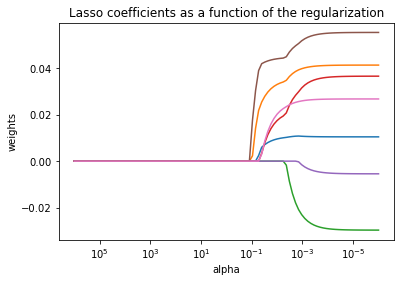

In [63]:
axis = plt.gca()

axis.plot(alphas, coefficients)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

As the alpha changes, the coefficieints remain at 0 until around the alpha of 10^-1. Thereafter, the coefficients vary greatly with a large range and level out at different small alpha levels.

In [64]:
import matplotlib.pyplot as plt
coefficients = []
# Part 3
for i in alphas:
    ridge = linear_model.Ridge(alpha = i, fit_intercept=False)
    ridge = ridge.fit(x_train, y_train)

    coefficients.append(ridge.coef_)


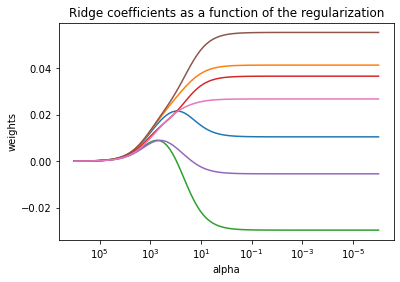

In [65]:
axis = plt.gca()

axis.plot(alphas, coefficients)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

The coefficients stay around the same level until around the alpha of 1000. Thereafter, the coefficients spread out and level out again at their respective weights at around an alpha of 10.

### Step 4

In [75]:
# Part 4
MSE = []
MAE = []

mse = 0
mae = 0

EY_train = np.exp(Y_train)

for i in alphas:

    for train_index, test_index in kf.split(X_train):
        
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = EY_train[train_index], EY_train[test_index]

        ridge = linear_model.Ridge(alpha = i)
        ridge = ridge.fit(x_train, y_train)
        
        mse += mean_squared_error(y_test, ridge.predict(x_test))
        mae += mean_absolute_error(y_test, ridge.predict(x_test))
        
    mse = mse/5
    mae = mse/5

    MSE.append(mse)
    MAE.append(mae)
    
    mse = 0
    mae = 0

print('MSE:', min(MSE))
print('MAE:', min(MAE))

MSE: 0.014815008775351055
MAE: 0.002963001755070211


In [76]:
min_value = min(MSE)
min_index = MSE.index(min_value)
min_index

43

In [77]:
MSE[min_index]

0.014815008775351055

In [78]:
alpha[min_index]

6.135907273413176

In [79]:
MSE = []
MAE = []

mse = 0
mae = 0


for i in alphas:

    for train_index, test_index in kf.split(X_train):
        
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = EY_train[train_index], EY_train[test_index]

        lasso = linear_model.Lasso(alpha = i)
        lasso = lasso.fit(x_train, y_train)
        
        mse += mean_squared_error(y_test, lasso.predict(x_test))
        mae += mean_absolute_error(y_test, lasso.predict(x_test))
        
    mse = mse/5
    mae = mse/5

    MSE.append(mse)
    MAE.append(mae)
    
    mse = 0
    mae = 0

print('MSE:', min(MSE))
print('MAE:', min(MAE))

MSE: 0.01476731964422993
MAE: 0.002953463928845986


In [80]:
min_value = min(MSE)
min_index = MSE.index(min_value)
min_index

72

In [81]:
MSE[min_index]

0.01476731964422993

In [82]:
alpha[min_index]

0.0018738174228603867

### Step 5

MSE: 0.004098968587261618
MAE: 0.0008197937174523237


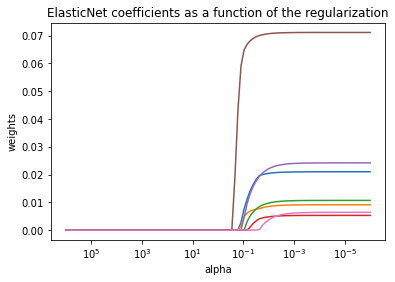

In [85]:
# Part 5
MSE = []
MAE = []

mse = 0
mae = 0


for i in alphas:

    for train_index, test_index in kf.split(X_train):
        
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]

        en = linear_model.ElasticNet(alpha = i)
        en = en.fit(x_train, y_train)
        
        mse += mean_squared_error(y_test, en.predict(x_test))
        mae += mean_absolute_error(y_test, en.predict(x_test))
        
    mse = mse/5
    mae = mse/5

    MSE.append(mse)
    MAE.append(mae)
    
    mse = 0
    mae = 0

print('MSE:', min(MSE))
print('MAE:', min(MAE))



alphas = 10**np.linspace(6,-6,100)
coefficients = []
for a in alphas:

    en = linear_model.ElasticNet(alpha = a)
    en = en.fit(x_train, y_train)
    coefficients.append(en.coef_)


ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ElasticNet coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Lasso
- Pros: As it uses a regularization parameter, it avoids overfitting and can handle large amounts of predictors. This results in some coefficients with low amounts or no amount of predictive weight and this minimizes the number of coefficients, i.e., bias.
- Cons: When there are some correlated features, it will randomly select one of them. Also, when there are more predictors than data, it will only pick predictors up to the amount of N.

Ridge:
- Pros: Uses the alpha to produce results with low bias and low variance and some coefficients will have very little affect on the result.
- Cons: It does not zero out cofficients, only reduces them. Model is hard to intrepret. 

ElasticNet:
- Pros: does not have problem as Lasso does, where number of predictors is greater than N.
- Cons: Does not remove highly correlated variables

### Step 6

In [86]:
# Part 6
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
reg.coef_

array([0.0252715 , 0.01431774, 0.00305373, 0.00072951, 0.02133006,
       0.07573555, 0.00686496])

In [87]:
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train, Y_train)

pred_train_lr= reg.predict(X_train)

print('MSE train: ',mean_squared_error(Y_train,pred_train_lr))
print('R-squared train: ',r2_score(Y_train, pred_train_lr))

pred_test_lr= reg.predict(X_test)
print('MSE test: ',mean_squared_error(Y_test,pred_test_lr))
print('R-squared test: ',r2_score(Y_test, pred_test_lr))

MSE train:  0.0038570690453814307
R-squared train:  0.8193370700006861
MSE test:  0.005200215496311306
R-squared test:  0.6910288907914794


In [88]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, Y_train) 
pred_train_ridge= ridge.predict(X_train)

print('MSE train: ',mean_squared_error(Y_train,pred_train_ridge))
print('R-squared train: ',r2_score(Y_train, pred_train_ridge))

pred_test_ridge= ridge.predict(X_test)
print('MSE test: ',mean_squared_error(Y_test,pred_test_ridge)) 
print('R-squared test: ',r2_score(Y_test, pred_test_ridge))

MSE train:  0.003857069067549536
R-squared train:  0.8193370689623446
MSE test:  0.0052000831653691605
R-squared test:  0.6910367532421811


In [89]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print('MSE train: ',np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print('R-squared train: ',r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print('MSE test: ',np.sqrt(mean_squared_error(Y_test,pred_test_lasso))) 
print('R-squared test: ',r2_score(Y_test, pred_test_lasso))

MSE train:  0.06335953771026617
R-squared train:  0.811966324270088
MSE test:  0.07119222093168762
R-squared test:  0.6988647373892298


In [90]:
print('MSE test: ',mean_squared_error(Y_test,pred_test_lasso))
print('R-squared test: ',r2_score(Y_test, pred_test_lasso))

MSE test:  0.00506833232118622
R-squared test:  0.6988647373892298


### Step 7

In [91]:
# Part 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=50)

In [92]:
import sklearn.linear_model as linear_model
n_splits = 5
kf = KFold(n_splits=n_splits)

In [93]:
MSE = []
MAE = []

mse=0
mae=0

for i in alphas:
    for train_index, test_index in kf.split(X_train):
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]

        ridge = linear_model.Ridge(alpha = i)
        ridge = ridge.fit(x_train, y_train)
        
        
        mse += mean_squared_error(y_test, ridge.predict(x_test))
        mae += mean_absolute_error(y_test, ridge.predict(x_test))
    mse = mse/5
    mae = mae/5
    
    MSE.append(mse)
    MAE.append(mae)
    
    mse=0
    mae=0
    
    
print('MSE: ',min(MSE))
print('MAE: ',min(MAE))

MSE:  0.004123596074823909
MAE:  0.046693163445344785


In [94]:
min_value = min(MSE)
min_index = MSE.index(min_value)
min_index

52

In [95]:
MSE[min_index]

0.004123596074823909

In [96]:
alpha[min_index]

0.49770235643321137

In [97]:
min_value = min(MAE)
min_index = MAE.index(min_value)
min_index

49

In [98]:
MAE[min_index]

0.046693163445344785

In [99]:
alpha[min_index]

1.1497569953977356

In [100]:
MSE = []
MAE = []

mse=0
mae=0

for i in alphas:
    for train_index, test_index in kf.split(X_train):
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]

        lasso = linear_model.Lasso(alpha = i)
        lasso = lasso.fit(x_train, y_train)
        
       
        mse += mean_squared_error(y_test, lasso.predict(x_test))
        mae += mean_absolute_error(y_test, lasso.predict(x_test))
    
    alpha.append(i)
    mse = mse/5
    mae = mae/5
    
    MSE.append(mse)
    MAE.append(mae)
    
    mse=0
    mae=0
    
    
print('MSE: ',min(MSE))
print('MAE: ',min(MAE))

MSE:  0.004114762849512672
MAE:  0.04664834386329588


In [101]:
min_value = min(MSE)
min_index = MSE.index(min_value)
min_index

76

In [102]:
MSE[min_index]

0.004114762849512672

In [103]:
alpha[min_index]

0.0006135907273413163

In [104]:
min_value = min(MAE)
min_index = MAE.index(min_value)
min_index

75

In [105]:
MAE[min_index]

0.04664834386329588

In [106]:
alpha[min_index]

0.0008111308307896856

In [107]:
MSE = []
MAE = []

mse = 0
mae = 0


for i in alphas:

    for train_index, test_index in kf.split(X_train):
        
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]

        en = linear_model.ElasticNet(alpha = i)
        en = en.fit(x_train, y_train)
        
        mse += mean_squared_error(y_test, en.predict(x_test))
        mae += mean_absolute_error(y_test, en.predict(x_test))
        
    mse = mse/5
    mae = mse/5

    MSE.append(mse)
    MAE.append(mae)
    
    mse = 0
    mae = 0

print('MSE:', min(MSE))
print('MAE:', min(MAE))

MSE: 0.004115711453677737
MAE: 0.0008231422907355474


In [108]:
min_value = min(MSE)
min_index = MSE.index(min_value)
min_index

74

In [109]:
MSE[min_index]

0.004115711453677737

In [110]:
alpha[min_index]

0.001072267222010321

In [111]:
min_value = min(MAE)
min_index = MAE.index(min_value)
min_index

74

In [112]:
MAE[min_index]

0.0008231422907355474

In [113]:
alpha[min_index]

0.001072267222010321

- Usually the scaling of the data is favored when predictors have different ranges of values (i.e., using year data and dollars). Scaling normally results in a better MSE, which is not the case in this example, and standardizes the data. The reguralization allows the model to detect true outliers and not just data based on two different types of quantitative data.